# Análisis de datos con Pyhon - Pre-entrega
Nombre y apellido: DE GARATE, ESTEBAN ALEJANDRO  
   
Comisión: TT252813 - 2C2025 Lunes 19 hs
  
.   



# Etapa 1

## Script básico
Actividades 2 y 3

In [1]:
# Generamos una lista de diccionarios que contenga algunos datos
ventas = [
  {'producto': 'notebook', 'precio': 1500.0, 'cantidad': 3},
  {'producto': 'monitor', 'precio': 500.0, 'cantidad': 5},
  {'producto': 'mouse', 'precio': 20.0, 'cantidad': 15}
]

In [2]:
# Calculamos las ventas acumuladas - map
venta_acumuladas = sum( map( lambda venta: venta["precio"] * venta["cantidad"], ventas))
venta_acumuladas

7300.0

In [ ]:
# Calculamos las ventas acumuladas - listas por comprensión
venta_acumuladas = sum( [venta["precio"] * venta["cantidad"] for venta in ventas])
venta_acumuladas

7300.0

## Import Datasets
Actividad 1

In [3]:
import pandas as pd

In [4]:
# Import dataset ventas
url = "https://github.com/alex-degarate/TT-2C2025-Data-Analitycs-Notebooks/raw/refs/heads/main/PreEntrega/Datasets/"
df_ventas = pd.read_csv( url + "ventas.csv")


In [5]:
# Import dataset clientes
df_clientes = pd.read_csv( url + "clientes.csv")

In [6]:
# Import dataset marketing
df_marketing = pd.read_csv( url + "marketing.csv")

In [7]:
df_ventas.head(3)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


## Dataframe VENTAS

### Análisis exploratorio de **datos**
Actividad 4

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [8]:
# Aplicamos info() para familiarizarnos con el dataframe
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     3035 non-null   int64  
 1   producto     3035 non-null   object 
 2   precio       3033 non-null   object 
 3   cantidad     3033 non-null   float64
 4   fecha_venta  3035 non-null   object 
 5   categoria    3035 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 142.4+ KB


In [9]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
df_ventas.head()

display(df_ventas.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


In [10]:
# Usar sample() para tomar registros al azar
df_ventas.sample(5)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
1228,660,Adorno de pared,$71.13,9.0,16/05/2024,Decoración
806,1611,Freidora eléctrica,$82.46,4.0,03/04/2024,Electrodomésticos
2972,497,Elementos de cerámica,$124.16,4.0,23/12/2024,Decoración
2520,1601,Freidora eléctrica,$32.54,11.0,27/10/2024,Electrodomésticos
773,221,Lámpara de mesa,$41.81,9.0,31/03/2024,Decoración


In [11]:
# Analizamos el campo precio
# Si es numerico se puede aplicar describe()
df_ventas["precio"].sample(5)

,precio
1701,$99.90
789,$72.91
2021,$99.07
686,$85.45
1378,$101.54


In [12]:
# Analizamos el campo cantidad
# si es numerico se puede aplicar describe()
df_ventas["cantidad"].sample(5)

,cantidad
1689,7.0
543,1.0
1216,9.0
2857,8.0
1204,9.0


In [13]:
# Analizamos el campo fecha_venta
df_ventas["fecha_venta"].sample(5)

,fecha_venta
1389,02/06/2024
1898,08/08/2024
2887,12/12/2024
245,29/01/2024
2785,29/11/2024


In [14]:
# Analizamos el campo categoria
# Probar con value_counts y unique
df_ventas["categoria"].value_counts()

,count
categoria,
Decoración,1015
Electrónica,1012
Electrodomésticos,1008


In [15]:
df_ventas["categoria"].unique()


array(['Decoración', 'Electrodomésticos', 'Electrónica'], dtype=object)

### Calidad de datos
Actividad 5

In [16]:
# Buscamos registros duplicados
df_ventas.duplicated().sum()

np.int64(35)

In [17]:
# Visualizamos los duplicados
# keep: 'first', 'last', False
df_ventas[df_ventas.duplicated(keep=False)].sort_values(by="id_venta")

,id_venta,producto,precio,cantidad,fecha_venta,categoria
820,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
826,56,Cortinas,$66.24,5.0,05/04/2024,Decoración
832,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
844,145,Alfombra,$41.72,8.0,06/04/2024,Decoración
878,204,Jarrón decorativo,$94.75,1.0,08/04/2024,Decoración
...,...,...,...,...,...,...
830,2545,Auriculares,$32.81,11.0,05/04/2024,Electrónica
883,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
889,2705,Auriculares,$87.29,2.0,08/04/2024,Electrónica
831,2778,SmartWatch,$70.66,7.0,05/04/2024,Electrónica


In [18]:
# Buscamos datos nulos
df_ventas.isnull().sum()

,0
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


In [19]:

# Visualizar los nulos
# df_ventas[df_ventas.isnull().any(axis=1)]
nulos_lista = df_ventas[df_ventas.isnull().any(axis=1)]
df_ventas[df_ventas.isnull().any(axis=1)]

,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,NaN,NaN,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,NaN,NaN,17/01/2024,Electrónica


In [20]:
# Hay 2 registros con nulos, en el mismo registro, los campos "precio" y "cantidad son nulos
# No se pueden rescatar y van a ser eliminados
nulos_numero  = len( nulos_lista)
nulos_porcentaje = nulos_numero * 100 / len(df_ventas)
print(f"Numero de nulos: {nulos_numero } registros")
print(f"Porcentaje de nulos: {nulos_porcentaje:.2f}% registros")


Numero de nulos: 2 registros
Porcentaje de nulos: 0.07% registros


In [21]:
# Analizar los precios de los NaN a ver que opciones tenemos
# df_ventas[df_ventas["producto"]=="Elementos de cerámica"]
# df_ventas["producto"].value_counts()
df_ventas["producto"].unique()


array(['Cuadro decorativo', 'Lámpara de mesa', 'Secadora', 'Heladera',
       'Horno eléctrico', 'Plancha de vapor', 'Proyector',
       'Rincón de plantas', 'Candelabro', 'Aspiradora',
       'Freidora eléctrica', 'Tablet', 'Cortinas', 'Adorno de pared',
       'Jarrón decorativo', 'Lavadora', 'Auriculares', 'Cámara digital',
       'Cafetera', 'Consola de videojuegos', 'Smartphone',
       'Elementos de cerámica', 'Espejo decorativo',
       'Parlantes Bluetooth', 'SmartWatch', 'Microondas', 'Batidora',
       'Alfombra', 'Televisor', 'Laptop'], dtype=object)

### Observaciones: VENTAS




* Cantidad de registros originales: 3035
* Columnas/campos originales: 6
* 35 registros duplicados &emsp; => eliminarlos
*  2 registros con datos nulos: id:[136, 139], < 0.1 % total &emsp; =>  dropna
* Campo precio: tipo objeto con `$`, removerlo y luego cambiar el dtype a float64
* Campo fecha: ajustar a dtype datetime

## Dataframe MARKETING

### Analisis exploratorio de datos

Aplicamos los métodos de EDA vistos en clase, `info`, `columns`, `dtypes`, `head`, `tail`, `sample`, `unique`, `value_counts`, `describe`, `duplicated`, `isnull`, etc. y documentamos las observaciones:

In [22]:
# Aplicamos info() para familiarizarnos con el dataframe
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


In [23]:
# Visualizamos los primeros registros con head()
# también podemos usar tail() para visualizar los últimos
pd.set_option('display.max_rows', None)
df_marketing.head()

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


In [24]:
# Analizamos el campo costo
df_marketing["costo"].sample(5)

,costo
54,5.16
60,5.22
37,5.46
75,4.64
2,5.54


In [25]:
# Analizamos el campo fecha_inicio
df_marketing["fecha_inicio"].sample(5)

,fecha_inicio
20,29/05/2024
83,23/11/2024
69,13/10/2024
49,14/08/2024
44,02/08/2024


In [26]:
# Analizamos el campo fecha_fin
df_marketing["fecha_fin"].sample(5)

,fecha_fin
40,30/08/2024
88,7/1/2025
11,17/06/2024
61,26/10/2024
28,22/07/2024


### Calidad de los datos


In [27]:
# Buscamos registros duplicados
df_marketing.duplicated().sum()

np.int64(0)

In [28]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_campanha   90 non-null     int64  
 1   producto      90 non-null     object 
 2   canal         90 non-null     object 
 3   costo         90 non-null     float64
 4   fecha_inicio  90 non-null     object 
 5   fecha_fin     90 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ KB


.  

### Observaciones: MARKETING

El dataframe DF_MARKETING tiene 90 registros

No hay registros duplicados

El campo fecha_inicio es objeto &emsp; => cambiar a dtype datetime

El campo fecha_fin &emsp; es objeto &emsp; => cambiar a dtype datetime


.  


## Dataframe CLIENTES

### Analisis exploratorio de datos

In [29]:
# Aplicamos info() para familiarizarnos con el dataframe
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [ ]:
#df_clientes[500:]

In [30]:
# Visualizamos los primeros registros con head()
df_clientes.head(1)

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68


In [31]:
# Buscamos registros duplicados
df_clientes.duplicated().sum()

np.int64(0)

In [32]:
# Buscamos datos nulos
df_clientes.isnull().sum()

,0
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


.  


### Observaciones

El dataframe CLIENTES tiene 567 registros.

No hay registros duplicados

No hay registros con valores nulos

El campo ciudad tiene ciudades con vocales acentuadas (poner vocales sin acento)

El campo nombre tiene nombres con apostrofe (sacar apostrofe)

###Calidad de los datos

In [33]:
# visualizamos las ciudades con vocales acentuadas y tilde (áéíóúñ)
ciudades_acentos = df_clientes[df_clientes["ciudad"].str.contains(r'[áéíóúñ]',regex=True)]

#display(ciudades_acentos.head())
# df_clientes[df_clientes["ciudad"].str.contains('á')].count()     # => 39
# df_clientes[df_clientes["ciudad"].str.contains('é')].count()     # => 0
# df_clientes[df_clientes["ciudad"].str.contains('í')].count()     # => 44
# df_clientes[df_clientes["ciudad"].str.contains('ó')].count()     # => 49
# df_clientes[df_clientes["ciudad"].str.contains('ú')].count()     # => 0
# df_clientes[df_clientes["ciudad"].str.contains('ñ')].count()     # => 0

ciudades_acentos.count()


,0
id_cliente,132
nombre,132
edad,132
ciudad,132
ingresos,132


In [34]:
# reemplazamos las vocales acentuadas por otras sin acento
# y (opcionalmente) podemos guardar en una nueva columna "city_normal"
import re

def replace_accented(match):
    char = match.group(0)
    mapping = {'á': 'a', 'é': 'e', 'í': 'i', 'ó': 'o', 'ú': 'u'}
    return mapping.get(char, char)

# 1 y 2 funcionan OK
# 1 df_clientes['city_normal'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', replace_accented, regex=True)
# 2
df_clientes['ciudad'] = df_clientes['ciudad'].str.replace(r'[áéíóú]', lambda match: replace_accented(match), regex=True)
'''
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('á','a')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('é','e')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('í','i')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ó','o')
df_clientes['city_normal'] = df_clientes['ciudad'].str.replace('ú','u')
# comparar resultados
display(df_clientes.loc[100:110,['ciudad', 'city_normal']].sample(10))
'''
display(df_clientes.loc[100:110,['ciudad']].sample(10))


,ciudad
103,Posadas
107,Mar del Plata
104,Merlo
102,San Miguel de Tucuman
100,Merlo
105,Bahia Blanca
101,Salta
109,Mar del Plata
108,Buenos Aires
106,Bahia Blanca


In [35]:
# nombres con apostrofes u otros
# Esta linea busca caracteres distintos de letras y espacio
metodo1 = df_clientes[df_clientes["nombre"].str.strip().str.contains(r"[^a-zA-Z\s+]", regex=True)].count()

# Esta linea busca especificamente por apostrofe, guion medio y punto
metodo2 = df_clientes[df_clientes["nombre"].str.contains(r"['-.]", regex=True)].count()

print(f"Metodo 1:\n {metodo1}")
print(f"\nMetodo 2:\n {metodo2}")



Metodo 1:
 id_cliente    15
nombre        15
edad          15
ciudad        15
ingresos      15
dtype: int64

Metodo 2:
 id_cliente    15
nombre        15
edad          15
ciudad        15
ingresos      15
dtype: int64


.  

# Etapa 2



## Limpieza de datos
Actividad 1 - Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.

.  

### Dataframe VENTAS

* 35 duplicados, eliminarlos - se eliminaron 35 duplicados &emsp; => Ok
* Algunos nulos (2), 1% del faltante, dropna - se eliminaron 2 registros con 2 NaN
* Campo precio: encontre `$`, removerlo y luego cambiar el dtype a float64 - Ok
* Campo fecha: ajustar a dtype datetime - Ok

In [36]:
# Eliminamos registros duplicados
# atributos a evaluar, keep, ignore_index, inplace
df_ventas.drop_duplicates(inplace=True, ignore_index=True)

In [37]:
# Validamos que no haya duplicados
df_ventas.duplicated().sum()

np.int64(0)

In [38]:
# Eliminamos registros con datos nulos
df_ventas.dropna(inplace=True)

In [39]:
# Validamos que no haya nulos
# df_ventas.isnull().sum()
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venta     2998 non-null   int64  
 1   producto     2998 non-null   object 
 2   precio       2998 non-null   object 
 3   cantidad     2998 non-null   float64
 4   fecha_venta  2998 non-null   object 
 5   categoria    2998 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 164.0+ KB


In [40]:
# Eliminamos el caracter especial $ de precio
# Normalización: usar replace()
# De ser necesario, podemos usar el atributo regex=True
df_ventas["precio"] = df_ventas["precio"].str.strip().str.replace("$", "")

In [41]:
# Validamos que precio no contenga $
df_ventas["precio"].sample(3)

,precio
1580,38.35
1586,76.68
2104,118.21


In [42]:
# Convertimos precio de str a float
# Podemos usar pd.to_numeric o astype o incluso combinarlos
df_ventas["precio"] = df_ventas["precio"].astype(float)


In [43]:
# Convertir el dtype de cantidad, de float64 a int64
df_ventas["cantidad"]= df_ventas["cantidad"].astype(int)

In [44]:
# Validar la conversion a int
df_ventas["cantidad"].dtypes


dtype('int64')

In [45]:
# Validamos campos numericos
df_ventas[["precio","cantidad"]].sample(3)

,precio,cantidad
235,103.27,3
1747,42.67,10
1578,110.83,2


In [46]:
# Convertir el campo fecha_venta a dtype datetime
# pd.to_datetime(df_ventas["fecha_venta"], format="%d/%m/%Y")
# pd.to_datetime(df_ventas["fecha_venta"], dayfirst=True)
df_ventas['fecha_venta'] = pd.to_datetime(df_ventas['fecha_venta'], format="%d/%m/%Y")

In [47]:
# Validar la conversion de fecha
df_ventas['fecha_venta'].dtype




dtype('<M8[ns]')

In [48]:
# Renombrar ventas["precio"] a ventas["precio_unit"]  porque me resulta confuso
df_ventas.rename(columns={"precio": "precio_unit"}, inplace=True)

In [49]:
# Validar cambios
df_ventas.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 164.0+ KB


In [50]:
# Hacemos una copia del DF ventas y guardamos a disco como csv
df_ventas_final = df_ventas.copy()

#df_ventas_final.to_csv("df_ventas_final.csv", index=False)

In [51]:
df_ventas_final.head()


,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración
2,1156,Secadora,97.96,3,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4,2024-01-02,Electrodomésticos


VENTAS  
El df_ventas_final contiene 2998 registros  
   

   

.  
  

================================================================================
  


### Dataframe marketing

ACCIONES

Convertir el campo fecha_inicio a dtype = datetime  
Convertir el campo fecha_fin    a dtype = datetime

In [52]:
# Convertir el campo fecha_inicio a dtype datetime
df_marketing['fecha_inicio'] = pd.to_datetime(df_marketing['fecha_inicio'], format="%d/%m/%Y")

In [53]:
# Convertir el campo fecha_fin a dtype datetime
df_marketing['fecha_fin'] = pd.to_datetime(df_marketing['fecha_fin'], format="%d/%m/%Y")

In [54]:
# Validamos los cambios
df_marketing[["fecha_inicio","fecha_fin"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha_inicio  90 non-null     datetime64[ns]
 1   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.5 KB


In [55]:
# Hacemos una copia del df_marketing
df_marketing_final = df_marketing.copy()

# Guardamos la copia a disco
df_marketing_final.to_csv('df_marketing_final.csv', index=False)

df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB


In [56]:
df_marketing.head(9)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
5,85,SmartWatch,TV,5.07,2024-04-01,2024-05-05
6,36,Plancha de vapor,Email,5.41,2024-04-02,2024-06-01
7,57,Batidora,Email,4.48,2024-04-10,2024-06-08
8,44,Adorno de pared,Email,5.08,2024-04-13,2024-05-10


   
   
### Dataframe clientes  


In [57]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB


In [58]:
df_clientes.head()


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahia Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


In [59]:
# Hacemos una copia del df_clientes
df_clientes_final = df_clientes.copy()

# Guardamos la copia a disco
df_clientes_final.to_csv('df_clientes_final.csv', index=False)

.  

# **Transformación de datos**
Actividad 2 - Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.

In [60]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración


In [61]:
# Transformación:
# Calculamos el valor de cada venta = precio_unit * cantidad

# Agregamos una nueva columna  valor_venta = monto
df_ventas_final["valor_venta"] = df_ventas_final["precio_unit"] * df_ventas["cantidad"]

In [62]:
# Visualizamos
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [63]:
# Agregación:
# Agrupar valor_venta por producto
# Sumamos las ventas dentro de cada grupo
tabla_ventas = (df_ventas_final.groupby("producto", as_index=False)["valor_venta"].sum())
tabla_ventas.head()

,producto,valor_venta
0,Adorno de pared,48093.49
1,Alfombra,44773.06
2,Aspiradora,50085.86
3,Auriculares,74175.58
4,Batidora,50979.20


In [64]:
# Usemos describe para analizar algunos valores del dataframe resultante
tabla_ventas.describe()

,valor_venta
count,30.000000
mean,48903.117333
std,13265.561715
min,11128.800000
25%,45601.920000
50%,48140.245000
75%,51092.960000
max,82276.380000


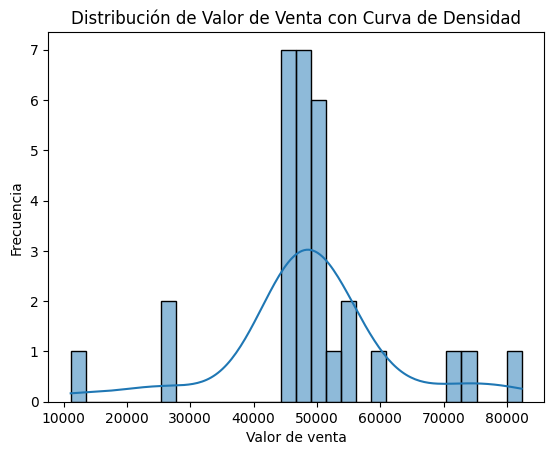

In [65]:
# Agregamos un plot para visualizar graficamente la distribución
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(tabla_ventas["valor_venta"], bins=30, kde=True, edgecolor="black")
plt.title("Distribución de Valor de Venta con Curva de Densidad")
plt.xlabel("Valor de venta")
plt.ylabel("Frecuencia")
plt.show()

### Alto Rendimiento
Los productos de alto rendimiento son aquellos que maximizan su utilidad, rentabilidad o eficiencia (se tomará quartil 75 )

In [66]:
# Calcular el percentil 75 (umbral de alto rendimiento)
umbral_ventas = tabla_ventas["valor_venta"].quantile(0.75)
umbral_ventas

np.float64(51092.96)

In [67]:
# Identificar productos que superan el umbral
# productos_top = tabla_ventas.query("valor_venta >= @umbral")
productos_top = tabla_ventas[tabla_ventas["valor_venta"] >= umbral_ventas]
productos_top

,producto,valor_venta
3,Auriculares,74175.58
5,Cafetera,59607.31
9,Cuadro decorativo,54297.60
16,Jarrón decorativo,51130.88
19,Lámpara de mesa,82276.38
20,Microondas,72562.89
25,Secadora,52115.45
27,Smartphone,54132.44


## Agregación
Actividad 3 - Resumir las ventas por categoría de producto y analizar los ingresos generados.

In [68]:
df_ventas_final.columns

Index(['id_venta', 'producto', 'precio_unit', 'cantidad', 'fecha_venta',
       'categoria', 'valor_venta'],
      dtype='object')

In [69]:
# Agrupamos por categoria y agregamos el total valor_venta por categoria
# (solo son 3 categorías )
ventas_categoria = df_ventas_final.groupby("categoria", as_index=False)["valor_venta"].sum()
ventas_categoria.head()

,categoria,valor_venta
0,Decoración,479216.09
1,Electrodomésticos,505299.63
2,Electrónica,482577.80


In [70]:
# Ordenar y mostrar los resultados
ventas_categoria.sort_values(by="valor_venta", ascending=False, inplace=True)
ventas_categoria

,categoria,valor_venta
1,Electrodomésticos,505299.63
2,Electrónica,482577.80
0,Decoración,479216.09


.  


## Integración de datos
Actividad 4 - Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.

In [71]:
df_ventas_final.head(2)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7
1,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5


In [72]:
df_ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 187.4+ KB


In [73]:
# df_marketing_final.info()

df_marketing_final.head()


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


In [74]:
# Vemos la cantidad de productos unicos en ventas
df_ventas_final["producto"].nunique()


30

In [111]:
# Vemos la cantidad de productos unicos en marketing
df_marketing["producto"].nunique()

30

In [ ]:
# Listamos los registros de ventas ordenados por producto, forma ascendente
df_ventas_final.sort_values(by="producto", ascending=True )


In [ ]:
# Listamos los registros de marketing ordenados por producto, forma ascendente
#df_marketing2 = df_marketing.sort_values(by="producto", ascending=True)
df_marketing.sort_values(by=["producto","canal"])

df_marketing.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05
5,85,SmartWatch,TV,5.07,2024-04-01,2024-05-05


In [77]:
# Para evitar duplicados, habria que agrupar marketing antes de hacer el merge
# (a costa de perder la fecha)
df_marketing_avg = df_marketing.groupby(["producto"], as_index=False)["costo"].mean()
df_marketing_avg

,producto,costo
0,Adorno de pared,4.683333
1,Alfombra,5.820000
2,Aspiradora,5.486667
3,Auriculares,5.080000
4,Batidora,5.093333
5,Cafetera,6.053333
6,Candelabro,4.883333
7,Consola de videojuegos,4.256667
8,Cortinas,5.786667
9,Cuadro decorativo,5.283333


In [95]:
# Unir los datasets ventas y marketing por columna 'producto'

# Aqui tenemos dos caminos, unir ventas con df_marketing que tiene duplicados
# met 1
ventas_marketing1 = pd.merge(df_ventas_final, df_marketing, on="producto", how="left")

# O, unir df_ventas con df_marketing_avg que no tiene duplicados, pero no tiene fechas
# met 2
ventas_marketing_avg = pd.merge(df_ventas_final, df_marketing_avg, on="producto", how="inner")


In [96]:
ventas_marketing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8994 entries, 0 to 8993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_venta      8994 non-null   int64         
 1   producto      8994 non-null   object        
 2   precio_unit   8994 non-null   float64       
 3   cantidad      8994 non-null   int64         
 4   fecha_venta   8994 non-null   datetime64[ns]
 5   categoria     8994 non-null   object        
 6   valor_venta   8994 non-null   float64       
 7   id_campanha   8994 non-null   int64         
 8   canal         8994 non-null   object        
 9   costo         8994 non-null   float64       
 10  fecha_inicio  8994 non-null   datetime64[ns]
 11  fecha_fin     8994 non-null   datetime64[ns]
dtypes: datetime64[ns](3), float64(3), int64(3), object(3)
memory usage: 843.3+ KB


In [97]:
ventas_marketing_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio_unit  2998 non-null   float64       
 3   cantidad     2998 non-null   int64         
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   valor_venta  2998 non-null   float64       
 7   costo        2998 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 187.5+ KB


In [98]:
# Verificar coincidencias (muestra)
ventas_marketing1.sort_values(by=["producto", "precio_unit"], ascending=True)
ventas_marketing1.head(6)

,id_venta,producto,precio_unit,cantidad,fecha_venta,categoria,valor_venta,id_campanha,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,1,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,31,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5,2024-01-02,Decoración,349.7,61,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,32,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,2,RRSS,5.88,2024-05-30,2024-06-29
5,811,Lámpara de mesa,105.10,5,2024-01-02,Decoración,525.5,62,TV,4.51,2024-08-26,2024-10-07


In [ ]:
# Nota1: si unieron ventas con marketing, obtienen 8994 registros
# Nota2: si unieron ventas con marketing_avg obtienen 2998 registros



### Analizamos el impacto de la campaña

In [103]:
# Nos quedamos solo con los registros de ventas durante la campaña de marketing
ganancias_marketing = ventas_marketing1.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")

# Nota: si trabajan con el DF marketing1 pueden aplicar el filtro,
# si trabajan con dataframe marketing_avg, al no tener fecha, no apliquen el filtro.


# Seleccionamos solo los campos que nos interesan: "producto", "valor_venta", "costo"
ganancias_marketing = ganancias_marketing[["producto", "valor_venta", "costo"]]
ganancias_marketing.sort_values(by="producto", ascending=True)
ganancias_marketing.head(6)


,producto,valor_venta,costo
2091,Adorno de pared,553.91,4.81
2124,Adorno de pared,579.54,4.81
2160,Adorno de pared,286.68,4.81
2256,Adorno de pared,831.20,4.81
2286,Lámpara de mesa,44.88,5.54
2298,Tablet,394.24,3.40


In [105]:
# Agrupamos por producto y hacemos una agregación por "valor de venta" y "costo"
ganancias_marketing = ganancias_marketing.groupby("producto")[["valor_venta","costo"]].sum()
ganancias_marketing

,valor_venta,costo
producto,,
Adorno de pared,15110.72,129.80
Alfombra,14786.14,172.57
Aspiradora,12844.78,163.92
Auriculares,19840.99,201.70
Batidora,22137.37,212.08
Cafetera,14459.17,160.84
Candelabro,5700.53,63.08
Consola de videojuegos,7785.49,68.69
Cortinas,14623.15,166.43


In [108]:

# Generamos una nueva columna con la diferencia entre lo vendido y lo invertido en la campaña
ganancias_marketing["ganancia_neta"] = ganancias_marketing['valor_venta'] - ganancias_marketing['costo']
ganancias_marketing = ganancias_marketing.sort_values(by="ganancia_neta", ascending=False)

ganancias_marketing.head()


,valor_venta,costo,ganancia_neta
producto,,,
Batidora,22137.37,212.08,21925.29
Auriculares,19840.99,201.70,19639.29
Cámara digital,19705.88,229.58,19476.30
Parlantes Bluetooth,17942.96,144.45,17798.51
Cuadro decorativo,17482.27,174.36,17307.91


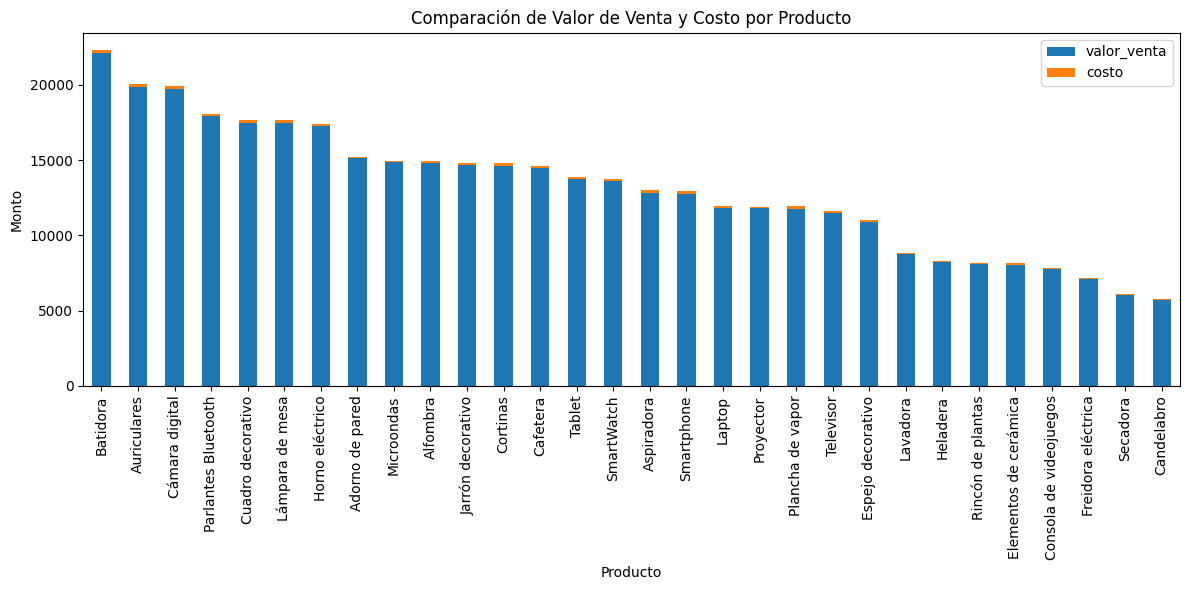

In [110]:
#
# Crear un gráfico de barras apilado para comparar valor_venta y costo por producto

ganancias_marketing[["valor_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# **Solución al problema de los duplicados**

In [121]:
# Hacemos el merge entre marketing y ventas por columna producto
marketing_ventas = pd.merge(df_marketing, df_ventas_final, on="producto", how="inner")
marketing_ventas.sort_values(by="producto", ascending=True)
marketing_ventas.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,id_venta,precio_unit,cantidad,fecha_venta,categoria,valor_venta
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,630,71.99,9,2024-01-04,Decoración,647.91
1,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,560,57.62,6,2024-01-07,Decoración,345.72
2,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,830,67.23,10,2024-01-10,Decoración,672.30
3,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,20,90.21,2,2024-01-14,Decoración,180.42
4,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,260,101.48,9,2024-01-15,Decoración,913.32
5,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,430,81.76,5,2024-01-18,Decoración,408.80


In [122]:
# filtramos solo aquellos productos que se hayan vendido dentro de la campaña
marketing_ventas_pp1 = marketing_ventas.query("fecha_venta > fecha_inicio & fecha_venta < fecha_fin")
marketing_ventas_pp1.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,id_venta,precio_unit,cantidad,fecha_venta,categoria,valor_venta
24,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,780,79.13,7,2024-03-21,Decoración,553.91
25,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,270,96.59,6,2024-03-22,Decoración,579.54
26,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,210,71.67,4,2024-03-24,Decoración,286.68
27,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,730,103.90,8,2024-03-28,Decoración,831.20
28,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,390,87.52,8,2024-04-01,Decoración,700.16
29,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,570,64.18,7,2024-04-03,Decoración,449.26


In [126]:
# Calculamos el total_ventas por producto haciendo valor_venta * cantidad
marketing_ventas_pp2 = marketing_ventas_pp1.copy() # para eliminar la advertencia
#marketing_ventas_pp2.info()

marketing_ventas_pp2["total_venta"] = (
    marketing_ventas_pp2["valor_venta"] * marketing_ventas_pp2["cantidad"]
)
marketing_ventas_pp2.head(6)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,id_venta,precio_unit,cantidad,fecha_venta,categoria,valor_venta,total_venta
24,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,780,79.13,7,2024-03-21,Decoración,553.91,3877.37
25,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,270,96.59,6,2024-03-22,Decoración,579.54,3477.24
26,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,210,71.67,4,2024-03-24,Decoración,286.68,1146.72
27,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,730,103.90,8,2024-03-28,Decoración,831.20,6649.60
28,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,390,87.52,8,2024-04-01,Decoración,700.16,5601.28
29,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03,570,64.18,7,2024-04-03,Decoración,449.26,3144.82


In [130]:
# Agrupamos el dataframe por producto usando .agg
# Agregar total_venta como el promedio, elimina el impacto de los datos duplicados
# Y seguimos agegando costo como la suma de lo invertido en cada canal
ganancias_marketing = marketing_ventas_pp2.groupby("producto").agg(
    {
        "total_venta": "mean",
        "costo": "sum",
    }
)
#ganancias_marketing

In [129]:
# A partir de venta_total y costo, calculamos la ganancia obtenida
ganancias_marketing["ganancia"] = ganancias_marketing["total_venta"]- ganancias_marketing["costo"]
ganancias_marketing = ganancias_marketing.sort_values(by="ganancia", ascending=False)
ganancias_marketing.head(3)


,total_venta,costo,ganancia
producto,,,
Microondas,6164.674783,104.89,6059.784783
Heladera,5786.587143,60.12,5726.467143
Cafetera,5388.738000,160.84,5227.898000


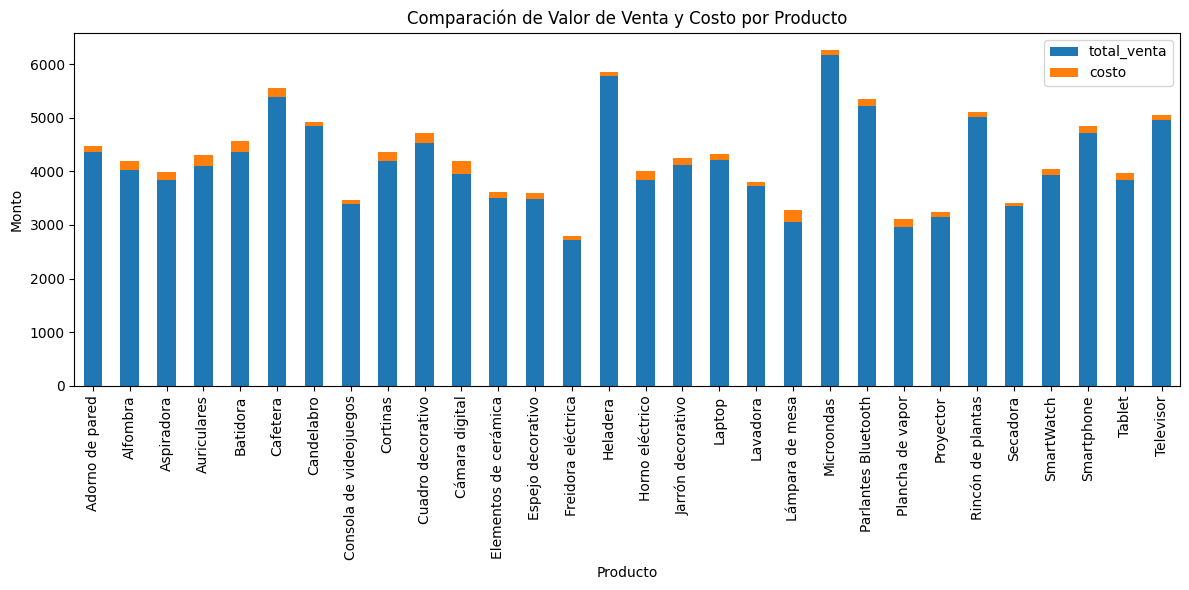

In [131]:
# Creamos un gráfico de barras apilado para comparar valor_venta y costo por producto
ganancias_marketing[["total_venta", "costo"]].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Comparación de Valor de Venta y Costo por Producto")
plt.xlabel("Producto")
plt.ylabel("Monto")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

================================================================================
# ANEXO

## PROBABLES MEJORAS A FUTURO

### *Trabajo en curso*

1 Crear lista categorias = df_ventas_final["categoria"].unique()  

2 Crear tabla df_producto con id_producto, producto, id_categoria, categoria

Se observó que:
1. Las ventas contienen productos con la misma denominación, sin ninguna id como para identificarlos. Pertenecen a distintas ventas individuales y tienen distinto precio.

2. Por tal razón es dificil hacer una evaluación seria del resultado de la campaña publicitaria, porque corresponde a distintos productos agrupados, con precio sin adjudicar.

3. La campaña de marketing posee el costo publicitario por producto (generico/agregado) pero no hay como relacionarlo con el costo_unitario, ni con el precio_venta

4. Sacar un precio_promedio, no estoy seguro que sirva mucho, porque la venta podria haberse hecho a un valor menor que el precio_unitario_promedio, debido a la gran dispersión de precios

Hemos visto que para el producto "Adorno de pared", los precios estan distibuidos en 3 segmentos o rangos, la idea es hacer un promedio por rango y
luego renombrar los productos segun el rango, por ej:
"Adorno de pared" => "Adorno de pared R1"

De esta manera en lugar de tener 100 productos genericos los tendriamos divididos por rango de precios y con un nuevo nombre_producto que los represente
  


.  


Borré el código anexo hasta la version definitiva